## 1- Import Necessary Libraries

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# Visualize libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## 2- Explore the Data

In [2]:
# Read both csv files (train and test)

train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe(include='all')         # summary of train data for all features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3- Data Analysis

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# See a sample of the dataset to get an idea of the variables
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.isnull(train_data).sum()     # total null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Some Observations:-
##### -) There are a total of 891 passengers in a titanic.
##### -) The Age feature has 714 values in it which means there are approx 177 missing values here which we need to fill them as it is important feature.
##### -) Ticket, Cabin and Name features are not important so drop them later as these have not any significance here. 
##### -) Fill null values in Embarked feature also as it is important feature in this project.

#### Some Predictions:-
##### -) Sex: Females are more likely to survive.
##### -) Age: Young passengers are more likely to survive.
##### -) Pclass: People of higher socioeconomic class are more likely to survive.

## 4- Data Visualization

### Take most relevant features:

#### Sex Feature 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

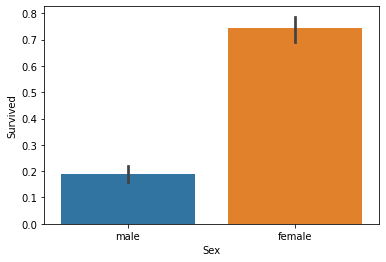

In [9]:
sns.barplot(x = 'Sex', y = 'Survived', data=train_data)

In [10]:
print("Percentage of females who survived :", train_data['Survived'][train_data['Sex'] == 'female'].value_counts
                                                                                               (normalize =  True)[1]*100)
print("Percentage of males who survived :", train_data['Survived'][train_data['Sex'] == 'male'].value_counts
                                                                                               (normalize =  True)[1]*100)

Percentage of females who survived : 74.20382165605095
Percentage of males who survived : 18.890814558058924


In [11]:
# The above plot and data shows that females have a higher chance of survival than the males

#### Pclass Feature

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

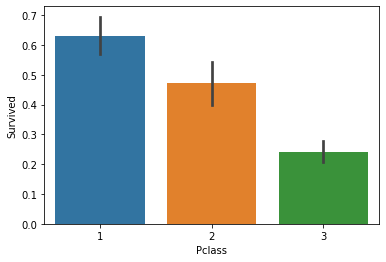

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

In [13]:
print("Percentage of Pclass 1 who survived :", train_data['Survived'][train_data['Pclass'] == 1].value_counts
                                                                                                  (normalize = True)[1]*100)
print("Percentage of Pclass 2 who survived :", train_data['Survived'][train_data['Pclass'] == 2].value_counts
                                                                                                  (normalize = True)[1]*100)
print("Percentage of Pclass 3 who survived :", train_data['Survived'][train_data['Pclass'] == 3].value_counts
                                                                                                  (normalize = True)[1]*100)

Percentage of Pclass 1 who survived : 62.96296296296296
Percentage of Pclass 2 who survived : 47.28260869565217
Percentage of Pclass 3 who survived : 24.236252545824847


In [14]:
# The above plot and data shows that people with higher socioeconomic class had a higher rate of survival

#### SibSp Feature 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

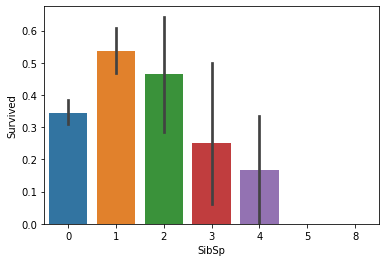

In [15]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_data)

In [16]:
print("Percentage of SibSp 0 who survived :", train_data['Survived'][train_data['SibSp'] == 0].value_counts
                                                                                             (normalize = True)[1]*100)
print("Percentage of SibSp 1 who survived :", train_data['Survived'][train_data['SibSp'] == 1].value_counts
                                                                                             (normalize = True)[1]*100)
print("Percentage of SibSp 2 who survived :", train_data['Survived'][train_data['SibSp'] == 2].value_counts
                                                                                             (normalize = True)[1]*100)

Percentage of SibSp 0 who survived : 34.53947368421053
Percentage of SibSp 1 who survived : 53.588516746411486
Percentage of SibSp 2 who survived : 46.42857142857143


In [17]:
# In general, people with more siblings and spouses had a lower chance of survival. Only those who have no spouses or 
# siblings were less likely to survive than those 1 or 2 

#### Parch Feature

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

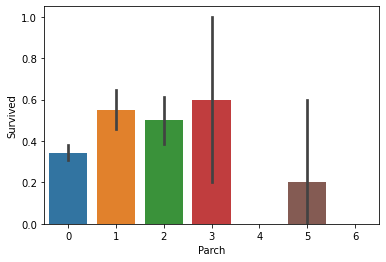

In [18]:
sns.barplot(x="Parch", y="Survived", data=train_data)

In [19]:
# People with less than four parents or children aboard are more likely to survive than those with four or more. 
# Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

#### Age Feature

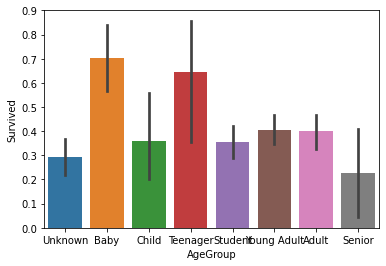

In [20]:
# Sort the ages into logical categories
# Age feature is in float format and contain null values 
train_data["Age"] = train_data["Age"].fillna(-0.5)   # Due to null values, we filled the columns to get the result 
test_data["Age"] = test_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 15, 24, 35, 60, np.inf]                  # for adjusting the plot 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'] # for giving names
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

In [21]:
# Plot shows that babies are more likely to survive than others

#### Cabin Feature

<AxesSubplot:xlabel='Cabin_f', ylabel='Survived'>

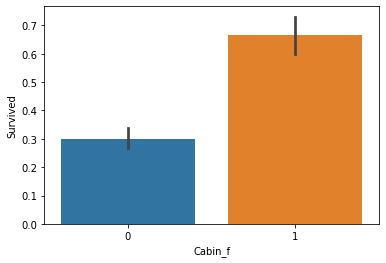

In [22]:
# Cabin feature is in string format so convert it first in integers then make plot to visualize the results

train_data['Cabin_f'] = train_data['Cabin'].notnull().astype('int')
test_data['Cabin_f'] = test_data['Cabin'].notnull().astype('int')

sns.barplot(x = 'Cabin_f', y = 'Survived', data = train_data)

In [23]:
print("Percentage of Cabin_f 0 who survived :", train_data['Survived'][train_data['Cabin_f'] == 0].value_counts
                                                                                                    (normalize=True)[1]*100)
print("Percentage of Cabin_f 1 who survived :", train_data['Survived'][train_data['Cabin_f'] == 1].value_counts
                                                                                                    (normalize=True)[1]*100)

Percentage of Cabin_f 0 who survived : 29.985443959243085
Percentage of Cabin_f 1 who survived : 66.66666666666666


In [24]:
# The above results shows that people with more Cabin number have higher chance of survival

## 5- Cleaning Data

In [25]:
# Now explore the test data
# Test data 
test_data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_f
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Student,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,99,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  AgeGroup     418 non-null    category
 12  Cabin_f      418 non-null    int32   
dtypes: category(1), float64(2), int32(1), int64(4), object(5)
memory usage: 38.4+ KB


In [27]:
# Drop the columns that are not useful  (Cabin Feature)
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

# Ticket Feature
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis=1)


In [28]:
# Embarked Feature
# Now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [29]:
train_data = train_data.fillna({"Embarked": "S"})   # replace the missing of Embarked Feature with values with S

### 6- Feature Engineering

In [30]:
# Create a combined group of both datasets
combine = [train_data, test_data]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [31]:
# Extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
# Make common title names 

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer',
                                                                                                        'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [33]:
# Mapping to make title into a numverical value
title_map = {'Mr': 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Royal' : 5, 'Rare' : 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [34]:
# Deal with the missing values in Age feature as there are many null values here, we can't replace with the same value so
# lets predict the missing ages 

In [35]:
# Fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        train_data["AgeGroup"][x] = age_title_mapping[train_data["Title"][x]]
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        test_data["AgeGroup"][x] = age_title_mapping[test_data["Title"][x]]

In [36]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

# Dropping the Age feature for now, it might change
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [37]:
# Drop the columns that are not useful (Name Feature)
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [38]:
# Map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [39]:
# Map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_f,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [40]:
# Fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] # Pclass = 3
        mean_fare = train_data[train_data["Pclass"] == pclass]["Fare"].mean()
        test_data.loc[x, "Fare"] = round(mean_fare, 4)

# Map Fare values into groups of numerical values
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels=[1, 2, 3, 4])

# Drop Fare values
train_data = train_data.drop(['Fare'], axis=1)
test_data = test_data.drop(['Fare'], axis=1)

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_f,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [42]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_f,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


### 7- Choosing the best model

In [43]:
# Splitting the training data
from sklearn.model_selection import train_test_split


predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

#### Testing different models

In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Logistic Regression model
print(acc_logreg)

79.33


In [45]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)   # accuracy of Support Vector Machines model
print(acc_svc)

82.12


In [46]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Random Forest model
print(acc_randomforest)

86.03


In [47]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)       # accuracy of k-Nearest Neighbors model
print(acc_knn)

82.12


In [48]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)        # accuracy of Gradient Boosting Classifier model
print(acc_gbk)

82.68


In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)    # accuracy of Decision Tree model
print(acc_decisiontree)

77.65


In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.03
5,Gradient Boosting Classifier,82.68
0,Support Vector Machines,82.12
1,KNN,82.12
2,Logistic Regression,79.33
4,Decision Tree,77.65


In [51]:
# The above table shows that, the Random Forest model has the highest model accuracy score 

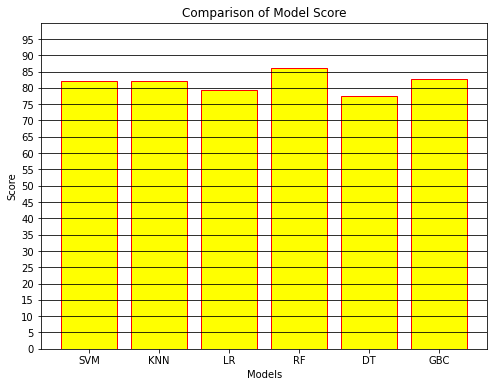

In [52]:
# Let's visualize the score of different models
models = ['SVM', 'KNN', 'LR',            # SVM = Support Vector Machines, LR = Logistic Regression, RF = Random Forest
              'RF', 'DT', 'GBC']         # DT = Decision Tree, GBC = Gradient Boosting Classifier, KNN = k-Nearest Neighbors

score = [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree, acc_gbk]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, score, color='yellow', edgecolor='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Score')
plt.ylim(0, 100)  # Set the y-axis limits to better visualize accuracy differences
plt.yticks(np.arange(0, 100, 5))
plt.grid(axis='y', color='black')
plt.show()

In [53]:
# As visualization plot(bar-plot) shows that, the Random Forest model has the highest model accuracy score 

In [54]:
# Based on the model's accuracy score, I'd go with the Random Forest model.

### Final Output prediction file

In [55]:
# Set ids as PassengerId and predict survival 
ids = test_data['PassengerId']
predictions = randomforest.predict(test_data.drop('PassengerId', axis=1))

# Set the output as a dataframe and convert to csv file named output_file.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('output_file.csv', index=False)

##### Final output of prediction of titanic survival is shown in the output_file which is in csv format.